In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('winners_f1_1950_2025_v2.csv')

In [3]:
print('dataset is loaded:')
print(f'\ndata shape{df.shape}')
print(f'\ntotal rides {len(df):,}')
print(f'\ntotal columns {len(df.columns)}')
df.info()

dataset is loaded:

data shape(1142, 9)

total rides 1,142

total columns 9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1142 non-null   object 
 1   continent    1142 non-null   object 
 2   grand_prix   1142 non-null   object 
 3   circuit      1142 non-null   object 
 4   winner_name  1142 non-null   object 
 5   team         1142 non-null   object 
 6   time         1142 non-null   object 
 7   laps         1142 non-null   float64
 8   year         1142 non-null   int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 80.4+ KB


In [4]:
print("First look at our data:")

print("\nDataset info:")
print(f"Total rows: {len(df):,}")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print(f"Years covered: {df['year'].min()} to {df['year'].max()}")


print("\nUnique counts:")
print(f"Continents: {df['continent'].nunique()}")
print(f"Grand Prix: {df['grand_prix'].nunique()}")
print(f"Circuits: {df['circuit'].nunique()}")
print(f"Winners: {df['winner_name'].nunique()}")
print(f"Teams: {df['team'].nunique()}")


print("\nLaps statistics:")
print(df['laps'].describe())


print("\nTop 10 teams by number of wins:")
print(df['team'].value_counts().head(10))


print("\nTop 10 winners by number of wins:")
print(df['winner_name'].value_counts().head(10))


print("\nNumber of races per year:")
print(df['year'].value_counts().sort_index())


print("\nNumber of races per continent:")
print(df['continent'].value_counts())


First look at our data:

Dataset info:
Total rows: 1,142
Date range: 1950-05-13 to 2025-08-03
Years covered: 1950 to 2025

Unique counts:
Continents: 6
Grand Prix: 36
Circuits: 77
Winners: 115
Teams: 65

Laps statistics:
count    1142.000000
mean       64.617338
std        20.065139
min         1.000000
25%        54.000000
50%        64.000000
75%        72.000000
max       200.000000
Name: laps, dtype: float64

Top 10 teams by number of wins:
team
Ferrari                       249
Mercedes                      121
McLaren Mercedes               85
Williams Renault               64
Lotus Ford                     47
McLaren Honda                  44
Red Bull Racing Renault        35
McLaren Ford                   35
Renault                        35
Red Bull Racing Honda RBPT     30
Name: count, dtype: int64

Top 10 winners by number of wins:
winner_name
Lewis Hamilton        105
Michael Schumacher     91
Max Verstappen         65
Sebastian Vettel       53
Alain Prost            51
Ayr

In [5]:
df_clean = df.copy()

df_clean['date'] = pd.to_datetime(df_clean['date'], errors='coerce')
df_clean['month'] = df_clean['date'].dt.month
df_clean['day'] = df_clean['date'].dt.day
df_clean['month_name'] = df_clean['date'].dt.strftime("%B")

df_clean['laps'] = df_clean['laps'].astype('Int64')  

print(df_clean[['date', 'year', 'month', 'day', 'month_name']].head())


        date  year  month  day month_name
0 1950-05-13  1950      5   13        May
1 1950-05-21  1950      5   21        May
2 1950-05-30  1950      5   30        May
3 1950-06-04  1950      6    4       June
4 1950-06-18  1950      6   18       June


In [6]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1142 non-null   datetime64[ns]
 1   continent    1142 non-null   object        
 2   grand_prix   1142 non-null   object        
 3   circuit      1142 non-null   object        
 4   winner_name  1142 non-null   object        
 5   team         1142 non-null   object        
 6   time         1142 non-null   object        
 7   laps         1142 non-null   Int64         
 8   year         1142 non-null   int64         
 9   month        1142 non-null   int32         
 10  day          1142 non-null   int32         
 11  month_name   1142 non-null   object        
dtypes: Int64(1), datetime64[ns](1), int32(2), int64(1), object(7)
memory usage: 99.4+ KB


In [7]:
print("Missing values per column:")
print(df_clean.isna().sum())

print("\nDuplicate rows:", df_clean.duplicated().sum())


Missing values per column:
date           0
continent      0
grand_prix     0
circuit        0
winner_name    0
team           0
time           0
laps           0
year           0
month          0
day            0
month_name     0
dtype: int64

Duplicate rows: 0


In [8]:
races_per_year = df_clean['year'].value_counts().sort_index()
print("Number of races per year:")
print(races_per_year)

races_per_continent = df_clean['continent'].value_counts()
print("\nNumber of races per continent:")
print(races_per_continent)

top_grand_prix = df_clean['grand_prix'].value_counts().head(10)
print("\nTop 10 Grand Prix by number of races:")
print(top_grand_prix)

top_circuits = df_clean['circuit'].value_counts().head(10)
print("\nTop 10 circuits by number of races:")
print(top_circuits)


Number of races per year:
year
1950     7
1951     9
1952     8
1953     9
1954     9
        ..
2021    22
2022    22
2023    22
2024    24
2025    14
Name: count, Length: 76, dtype: int64

Number of races per continent:
continent
Europe           686
Asia             163
North America    158
South America     72
Oceania           39
Africa            24
Name: count, dtype: int64

Top 10 Grand Prix by number of races:
grand_prix
Italy            82
Great Britain    81
United States    80
Germany          79
Monaco           71
Belgium          70
France           63
Spain            62
Canada           54
Brazil           51
Name: count, dtype: int64

Top 10 circuits by number of races:
circuit
Autodromo Nazionale di Monza    75
Circuit de Monaco               71
Silverstone Circuit             59
Circuit de Spa Francorchamps    58
Circuit Gilles Villeneuve       44
Autodromo José Carlos Pace      41
Nürburgring                     41
Hungaroring                     40
Red Bull Ring  

In [9]:
top_teams = df_clean['team'].value_counts().head(10)
print("Top 10 teams by number of wins:")
print(top_teams)

top_winners = df_clean['winner_name'].value_counts().head(10)
print("\nTop 10 winners by number of wins:")
print(top_winners)

top_5_teams = top_teams.index[:5]  
team_wins_per_year = df_clean[df_clean['team'].isin(top_5_teams)].groupby(['year', 'team']).size().unstack(fill_value=0)
print("\nWins of top 5 teams per year:")
print(team_wins_per_year)


Top 10 teams by number of wins:
team
Ferrari                       249
Mercedes                      121
McLaren Mercedes               85
Williams Renault               64
Lotus Ford                     47
McLaren Honda                  44
Red Bull Racing Renault        35
McLaren Ford                   35
Renault                        35
Red Bull Racing Honda RBPT     30
Name: count, dtype: int64

Top 10 winners by number of wins:
winner_name
Lewis Hamilton        105
Michael Schumacher     91
Max Verstappen         65
Sebastian Vettel       53
Alain Prost            51
Ayrton Senna           41
Fernando Alonso        32
Nigel Mansell          31
Jackie Stewart         27
Jim Clark              25
Name: count, dtype: int64

Wins of top 5 teams per year:
team  Ferrari  Lotus Ford  McLaren Mercedes  Mercedes  Williams Renault
year                                                                   
1951        3           0                 0         0                 0
1952        7    

In [10]:
laps_per_year = df_clean.groupby('year')['laps'].mean()
print("Average laps per year:")
print(laps_per_year)


races_per_month = df_clean['month_name'].value_counts().reindex([
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
])
print("\nNumber of races per month:")
print(races_per_month)


Average laps per year:
year
1950    75.571429
1951    76.888889
1952         81.0
1953    81.777778
1954    80.222222
          ...    
2021    58.954545
2022    58.818182
2023    60.227273
2024    60.166667
2025    60.214286
Name: laps, Length: 76, dtype: Float64

Number of races per month:
month_name
January       25
February       3
March         84
April         90
May          160
June         134
July         188
August       130
September    144
October      120
November      54
December      10
Name: count, dtype: int64


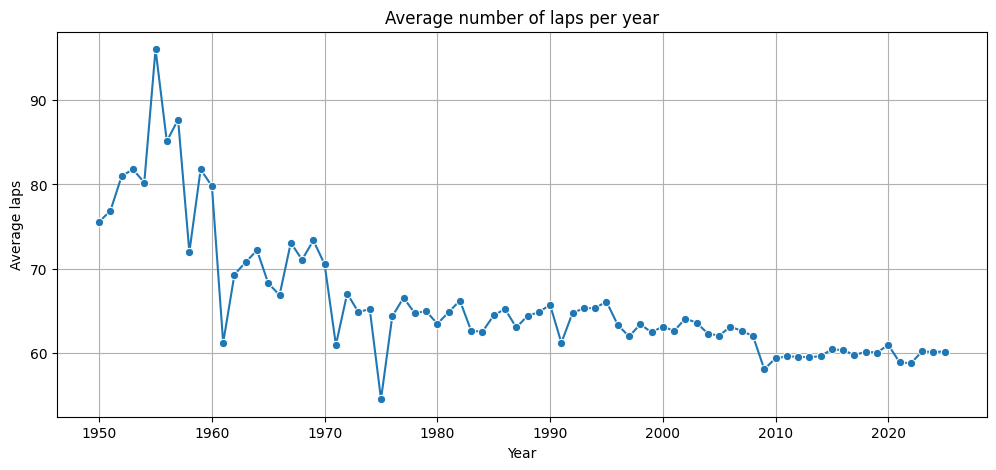

C:\Users\user\AppData\Local\Temp\ipykernel_6732\4048158104.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=races_per_month.index, y=races_per_month.values, palette="viridis")


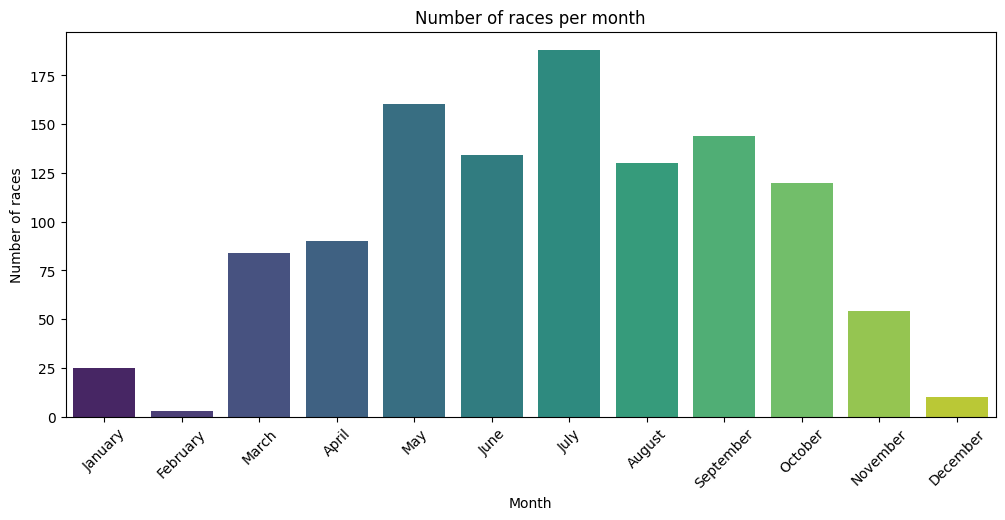

In [11]:
laps_per_year = df_clean.groupby('year')['laps'].mean()

plt.figure(figsize=(12,5))
sns.lineplot(x=laps_per_year.index, y=laps_per_year.values, marker='o')
plt.title("Average number of laps per year")
plt.xlabel("Year")
plt.ylabel("Average laps")
plt.grid(True)
plt.show()

races_per_month = df_clean['month_name'].value_counts().reindex([
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
])

plt.figure(figsize=(12,5))
sns.barplot(x=races_per_month.index, y=races_per_month.values, palette="viridis")
plt.title("Number of races per month")
plt.xlabel("Month")
plt.ylabel("Number of races")
plt.xticks(rotation=45)
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_6732\2500030511.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_teams.index, y=top_teams.values, palette="magma")


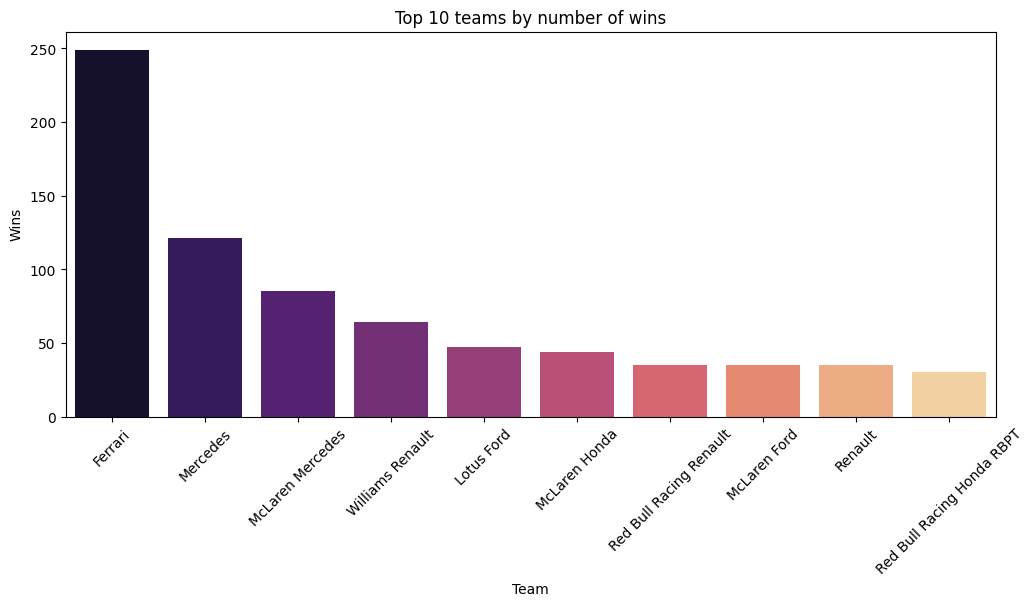

C:\Users\user\AppData\Local\Temp\ipykernel_6732\2500030511.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_winners.index, y=top_winners.values, palette="coolwarm")


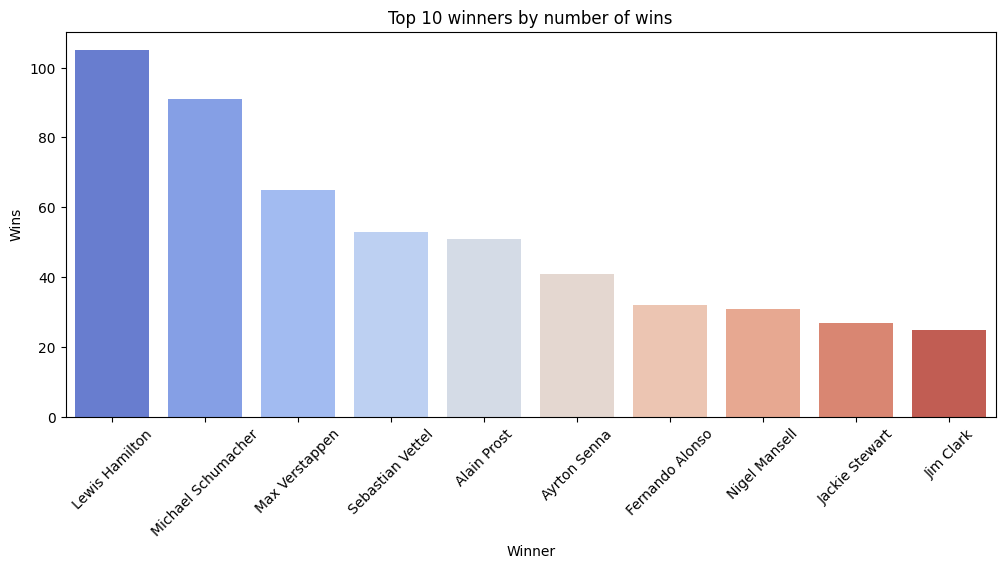

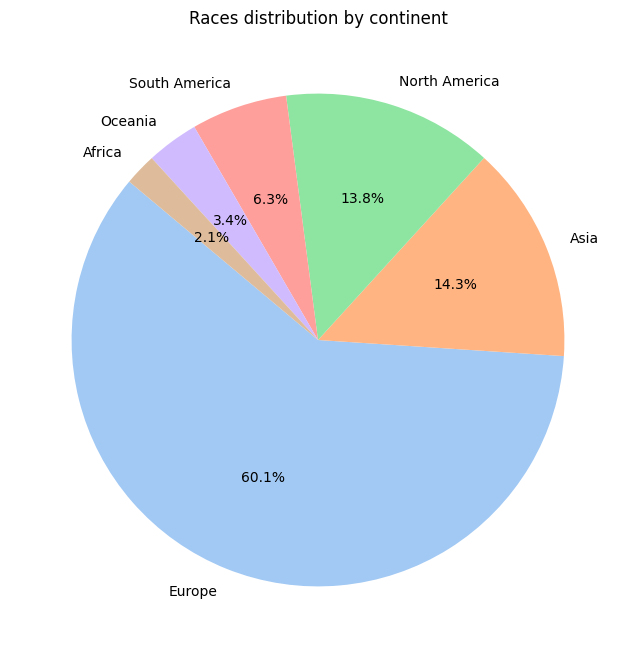

In [19]:
top_teams = df_clean['team'].value_counts().head(10)
plt.figure(figsize=(12,5))
sns.barplot(x=top_teams.index, y=top_teams.values, palette="magma")
plt.title("Top 10 teams by number of wins")
plt.xlabel("Team")
plt.ylabel("Wins")
plt.xticks(rotation=45)
plt.show()

top_winners = df_clean['winner_name'].value_counts().head(10)
plt.figure(figsize=(12,5))
sns.barplot(x=top_winners.index, y=top_winners.values, palette="coolwarm")
plt.title("Top 10 winners by number of wins")
plt.xlabel("Winner")
plt.ylabel("Wins")
plt.xticks(rotation=45)
plt.show()

continent_counts = df_clean['continent'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(continent_counts.values, labels=continent_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Races distribution by continent")
plt.show()


In [27]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 1142 non-null   datetime64[ns]
 1   continent            1142 non-null   object        
 2   grand_prix           1142 non-null   object        
 3   circuit              1142 non-null   object        
 4   winner_name          1142 non-null   object        
 5   team                 1142 non-null   object        
 6   time                 1142 non-null   object        
 7   laps                 1142 non-null   Int64         
 8   year                 1142 non-null   int64         
 9   month                1142 non-null   int32         
 10  day                  1142 non-null   int32         
 11  month_name           1142 non-null   object        
 12  continent_encoded    1142 non-null   int64         
 13  grand_prix_encoded   1142 non-nul

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
cols_to_encode = [
    'continent',
    'grand_prix',
    'circuit',
    'winner_name',
    'team',
    'month_name'
]
label_dict = {}
for col in cols_to_encode:
    label = LabelEncoder()
    df_clean[col+'_encoded'] = label.fit_transform(df_clean[col])
    label_dict[col] = label


In [31]:
df_clean['time_seconds'] = df_clean['time'].apply(
    lambda t: int(t.split(':')[0])*3600 + int(t.split(':')[1])*60 + int(t.split(':')[2])
    if len(t.split(':')) == 3 else
    int(t.split(':')[0])*60 + int(t.split(':')[1]) if len(t.split(':')) == 2 else None
)


df_clean[['time', 'time_seconds']].head(10)


,time,time_seconds
0,02:13:23,8003
1,03:13:18,11598
2,02:46:55,10015
3,02:02:53,7373
4,02:47:26,10046
5,02:57:52,10672
6,02:51:17,10277
7,02:07:53,7673
8,03:57:38,14258
9,02:45:46,9946


In [38]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 1142 non-null   datetime64[ns]
 1   continent            1142 non-null   object        
 2   grand_prix           1142 non-null   object        
 3   circuit              1142 non-null   object        
 4   winner_name          1142 non-null   object        
 5   team                 1142 non-null   object        
 6   time                 1142 non-null   object        
 7   laps                 1142 non-null   Int64         
 8   year                 1142 non-null   int64         
 9   month                1142 non-null   int32         
 10  day                  1142 non-null   int32         
 11  month_name           1142 non-null   object        
 12  continent_encoded    1142 non-null   int64         
 13  grand_prix_encoded   1142 non-nul

In [32]:
# feature_cols = [
#     'laps', 'year', 'month', 'day', 'time_seconds',
#     'continent_encoded', 'grand_prix_encoded',
#     'circuit_encoded', 'winner_name_encoded', 'month_name_encoded'
# ]

# X = df_clean[feature_cols]
# y = df_clean['team_encoded']

In [33]:
from sklearn.model_selection import train_test_split

In [35]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101,)

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [37]:
# model = RandomForestClassifier(n_estimators=200, random_state=101)
# model.fit(X_train, y_train)


# y_pred = model.predict(X_test)


# print("Accuracy:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

Accuracy: 0.6768558951965066
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           3       0.80      1.00      0.89         4
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           8       1.00      0.50      0.67         2
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         1
          13       0.50      0.50      0.50         2
          16       0.00      0.00      0.00         1
          17       0.60      0.70      0.64        56
          19       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          22       1.00      1.00      1.00         1
          24       0.00      0.00      0.00         

C:\Users\user\Desktop\ML 20 - 30\venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\user\Desktop\ML 20 - 30\venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\user\Desktop\ML 20 - 30\venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0

In [39]:
top_10_teams = df_clean['team_encoded'].value_counts().nlargest(10).index

In [40]:
df_clean['team_top'] = df_clean['team_encoded'].apply(lambda x: x if x in top_10_teams else -1)

In [41]:
feature_cols = [
    'laps', 'year', 'month', 'day', 'time_seconds',
    'continent_encoded', 'grand_prix_encoded',
    'circuit_encoded', 'winner_name_encoded', 'month_name_encoded'
]

In [42]:
X = df_clean[feature_cols]
y = df_clean['team_top']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [44]:
model = RandomForestClassifier(n_estimators=200, random_state=101)
model.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [45]:
y_pred = model.predict(X_test)


In [46]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7205240174672489
              precision    recall  f1-score   support

          -1       0.66      0.82      0.73        74
          17       0.73      0.59      0.65        56
          29       1.00      0.22      0.36         9
          36       0.00      0.00      0.00         4
          37       0.90      0.90      0.90        10
          38       0.54      0.72      0.62        18
          40       0.96      0.96      0.96        25
          48       1.00      0.71      0.83         7
          50       0.83      1.00      0.91         5
          52       0.40      0.29      0.33         7
          63       0.85      0.79      0.81        14

    accuracy                           0.72       229
   macro avg       0.72      0.64      0.65       229
weighted avg       0.73      0.72      0.71       229



In [47]:
importances = model.feature_importances_
for col, imp in zip(feature_cols, importances):
    print(f"{col}: {imp:.3f}")


laps: 0.070
year: 0.309
month: 0.038
day: 0.086
time_seconds: 0.115
continent_encoded: 0.017
grand_prix_encoded: 0.045
circuit_encoded: 0.050
winner_name_encoded: 0.235
month_name_encoded: 0.035


In [48]:
import plotly.express as px

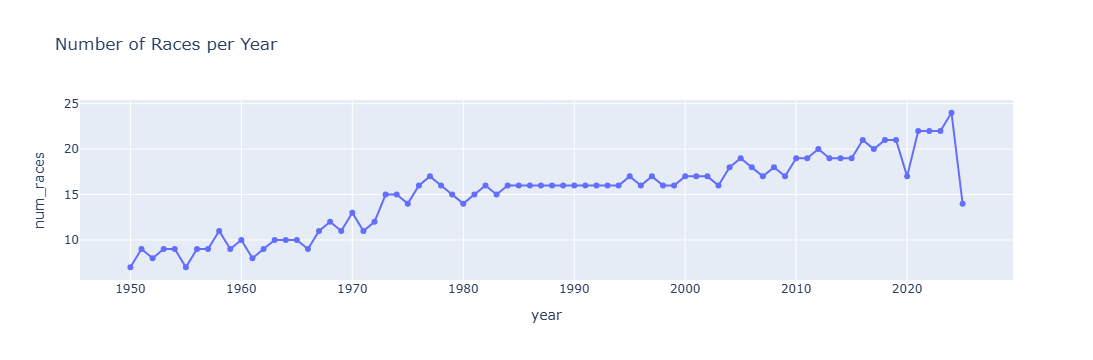

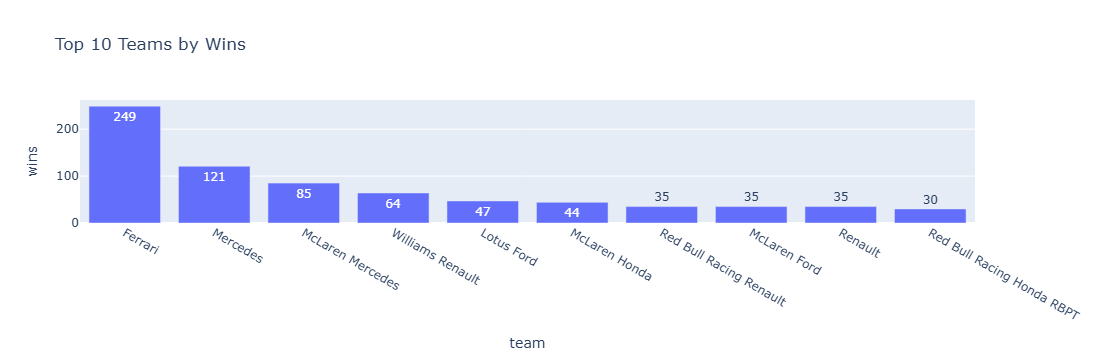

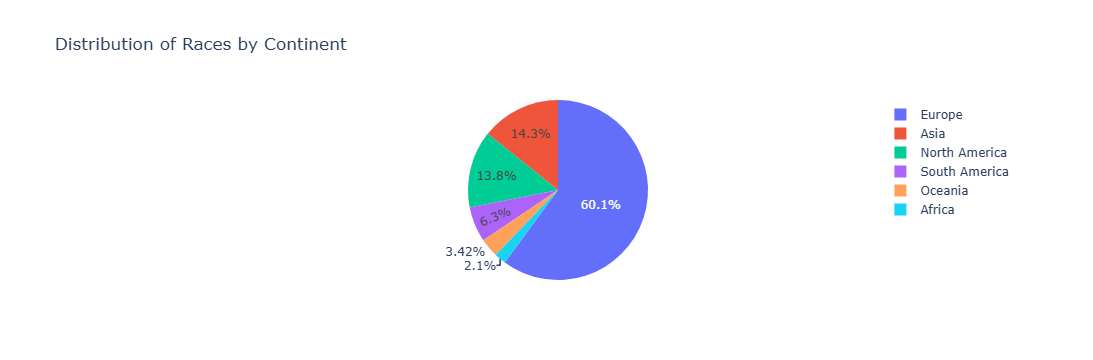

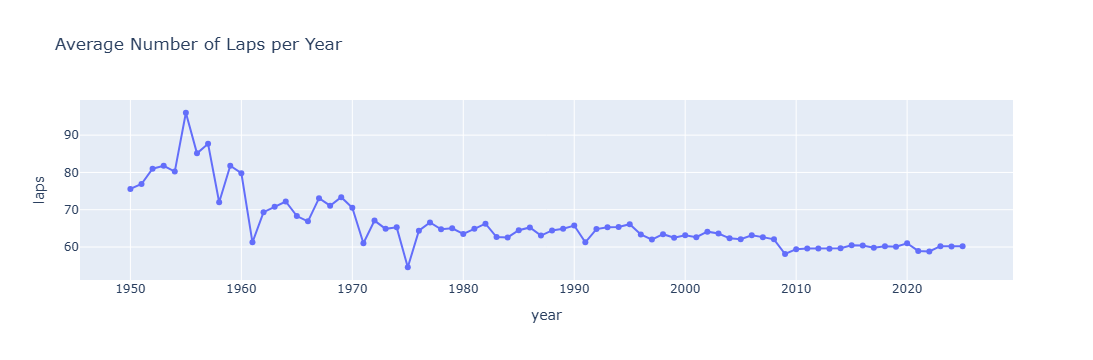

In [50]:
races_per_year = df_clean.groupby('year').size().reset_index(name='num_races')
fig1 = px.line(races_per_year, x='year', y='num_races', title='Number of Races per Year', markers=True)
fig1.show()

team_wins = df_clean['team'].value_counts().nlargest(10).reset_index()
team_wins.columns = ['team', 'wins']
fig2 = px.bar(team_wins, x='team', y='wins', title='Top 10 Teams by Wins', text='wins')
fig2.show()

continent_counts = df_clean['continent'].value_counts().reset_index()
continent_counts.columns = ['continent', 'num_races']
fig3 = px.pie(continent_counts, names='continent', values='num_races', title='Distribution of Races by Continent')
fig3.show()

laps_per_year = df_clean.groupby('year')['laps'].mean().reset_index()
fig4 = px.line(laps_per_year, x='year', y='laps', title='Average Number of Laps per Year', markers=True)
fig4.show()